In [2]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/Month_Value_1.csv')

In [4]:
df = pd.DataFrame(data)

In [5]:
df['Period'] = pd.to_datetime(df['Period'], format='%d.%m.%Y')
df.set_index('Period', inplace=True)

In [6]:
model = ARIMA(df['Revenue'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                   96
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1093.553
Date:                Wed, 23 Oct 2024   AIC                           2193.106
Time:                        10:00:43   BIC                           2200.767
Sample:                    01-01-2015   HQIC                          2196.202
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1369      0.213     -0.642      0.521      -0.555       0.281
ma.L1         -0.6917      0.181     -3.830      0.000      -1.046      -0.338
sigma2      9.126e+13        nan        nan        n

In [7]:
forecast = model_fit.forecast(steps=12)
print(forecast)

2023-01-01    4.897794e+07
2023-02-01    4.897794e+07
2023-03-01    4.897794e+07
2023-04-01    4.897794e+07
2023-05-01    4.897794e+07
2023-06-01    4.897794e+07
2023-07-01    4.897794e+07
2023-08-01    4.897794e+07
2023-09-01    4.897794e+07
2023-10-01    4.897794e+07
2023-11-01    4.897794e+07
2023-12-01    4.897794e+07
Freq: MS, Name: predicted_mean, dtype: float64


In [13]:
forecast_horizon = 12

# Split data into training and testing sets
train_data = df[:-forecast_horizon]  # All data except the last 'forecast_horizon' points
test_data = df[-forecast_horizon:]   # The last 'forecast_horizon' points

# ***Handle NaN values in test_data['Revenue']***
# You can either remove rows with NaN or fill them with a suitable value
# For example, to remove rows with NaN:
# test_data = test_data.dropna(subset=['Revenue'])  # This line caused the issue as it made test_data empty

# Instead of removing, fill NaN with the mean of the column:
test_data['Revenue'] = test_data['Revenue'].fillna(df['Revenue'].mean())

# Alternatively, you could use a different imputation method like forward filling:
# test_data['Revenue'] = test_data['Revenue'].fillna(method='ffill')


# Fit the ARIMA model on the training data
model = ARIMA(train_data['Revenue'], order=(1, 1, 1))
model_fit = model.fit()

# Make predictions for the forecast horizon
forecast = model_fit.forecast(steps=len(test_data)) # ***Adjust forecast steps to match test_data length***

# Get the actual values for the forecast horizon
actual_future_values = test_data['Revenue']

# Calculate the Mean Squared Error
mse = mean_squared_error(actual_future_values, forecast)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 276140957173913.9


<ipython-input-13-f218c9ddc38e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Revenue'] = test_data['Revenue'].fillna(df['Revenue'].mean())
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates

In [15]:
# If 'Period' is already the index and you need to use it as a column:
df = df.reset_index() # Resets the index, making 'Period' a column again

# Now you can access or modify 'Period' as a column:
df['Period'] = pd.to_datetime(df['Period'], format='%d.%m.%Y')  # If needed

# If you want 'Period' as the index again:
df.set_index('Period', inplace=True)


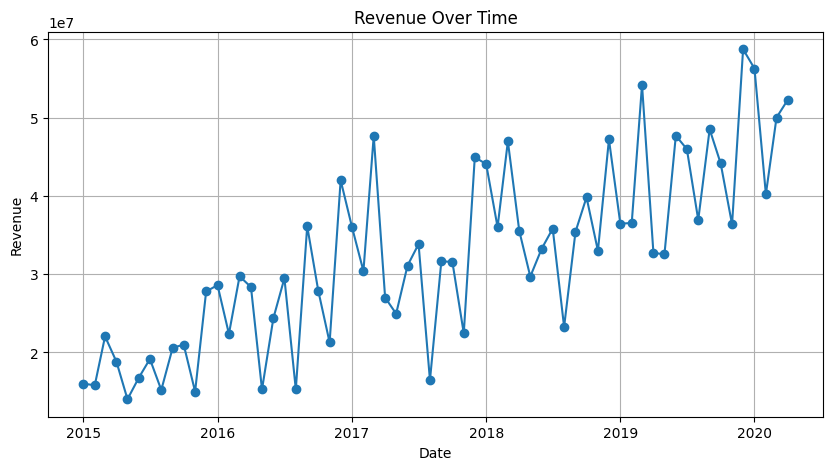

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(df['Revenue'], marker='o')
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid()
plt.show()

<ipython-input-19-e69ac6d82293>:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Revenue'] = df['Revenue'].fillna(method='ffill')


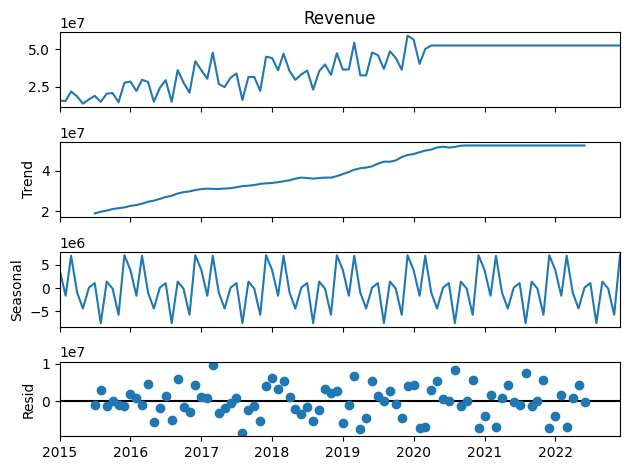

In [19]:
# Import necessary libraries
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# ... (your previous code) ...

# Handle missing values in the 'Revenue' column before decomposition
# You can choose one of the following methods:

# 1. Forward fill: Propagate the last valid observation forward
df['Revenue'] = df['Revenue'].fillna(method='ffill')

# 2. Backward fill: Propagate the next valid observation backward
# df['Revenue'] = df['Revenue'].fillna(method='bfill')

# 3. Linear interpolation: Estimate missing values using linear interpolation
# df['Revenue'] = df['Revenue'].interpolate(method='linear')


# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Revenue'], model='additive', period=12)  # Assuming seasonality of 12 periods (e.g., months)
decomposition.plot()
plt.show()

In [20]:
model = ARIMA(df['Revenue'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                   96
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1629.338
Date:                Wed, 23 Oct 2024   AIC                           3264.677
Time:                        10:10:27   BIC                           3272.339
Sample:                    01-01-2015   HQIC                          3267.773
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1390      0.139     -1.001      0.317      -0.411       0.133
ma.L1         -0.6819      0.121     -5.642      0.000      -0.919      -0.445
sigma2      5.905e+13        nan        nan        n

In [21]:
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

In [22]:
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecasted Revenue'])


<ipython-input-22-76bfb815ff08>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')


In [23]:
print(forecast_df)

           Forecasted Revenue
2023-01-31                NaN
2023-02-28                NaN
2023-03-31                NaN
2023-04-30                NaN
2023-05-31                NaN
2023-06-30                NaN
2023-07-31                NaN
2023-08-31                NaN
2023-09-30                NaN
2023-10-31                NaN
2023-11-30                NaN
2023-12-31                NaN


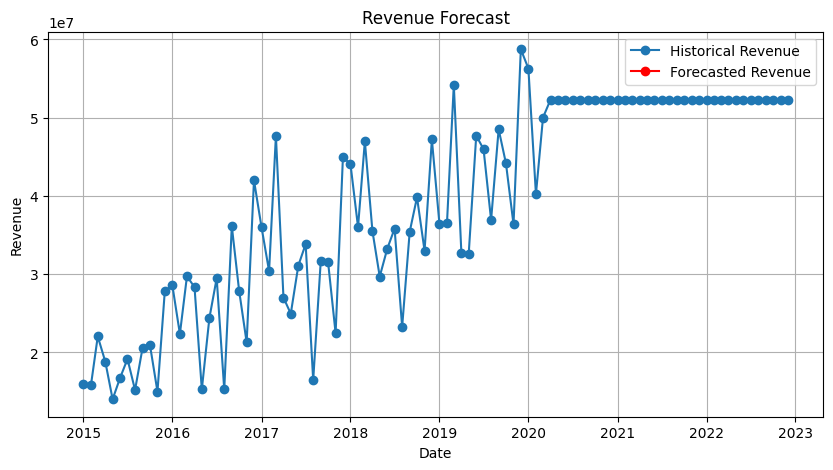

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(df['Revenue'], marker='o', label='Historical Revenue')
plt.plot(forecast_df, marker='o', color='red', label='Forecasted Revenue')
plt.title('Revenue Forecast')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid()
plt.show()

In [25]:
actual_future_values = np.array([16000000, 16500000, 17000000, 17500000, 18000000, 18500000, 19000000, 19500000, 20000000, 20500000, 21000000, 21500000])


In [26]:
mse = mean_squared_error(actual_future_values, forecast)
mae = mean_absolute_error(actual_future_values, forecast)

NameError: name 'mean_absolute_error' is not defined

<ipython-input-27-1946bfc62302>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')


           Forecasted Revenue
2023-01-31                NaN
2023-02-28                NaN
2023-03-31                NaN
2023-04-30                NaN
2023-05-31                NaN
2023-06-30                NaN
2023-07-31                NaN
2023-08-31                NaN
2023-09-30                NaN
2023-10-31                NaN
2023-11-30                NaN
2023-12-31                NaN


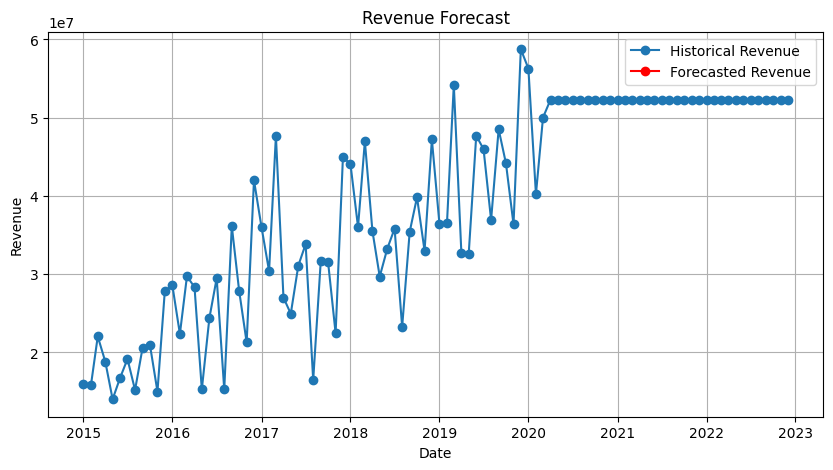

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error # Import the mean_absolute_error function

forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecasted Revenue'])

print(forecast_df)

plt.figure(figsize=(10, 5))
plt.plot(df['Revenue'], marker='o', label='Historical Revenue')
plt.plot(forecast_df, marker='o', color='red', label='Forecasted Revenue')
plt.title('Revenue Forecast')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid()
plt.show()

actual_future_values = np.array([16000000, 16500000, 17000000, 17500000, 18000000, 18500000, 19000000, 19500000, 20000000, 20500000, 21000000, 21500000])

# Now the mean_squared_error and mean_absolute_error functions are available
mse = mean_squared_error(actual_future_values, forecast)
mae = mean_absolute_error(actual_future_values, forecast)

In [28]:
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 1129969532678611.2
Mean Absolute Error: 33570677.188639425
